# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# Create a list for holding the cities.
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
#coordinates = list(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
           cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
record = 1 
sets = 1

city_list = []

for index, city in enumerate(cities):
         
    if record == 50:
            record += 1
            sets +=1
            time.sleep(60)
            
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
        url = url + "&q="+ city.replace(" ", "+")
        response = requests.get(url).json()
                            
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_description = response['weather'][0]['description']
        
        city_list.append({
            "city": city, 
            "lat": city_lat,
            "lon": city_lon,
            "temp_max": city_temp,
            "humidity": city_humidity,
            "clouds": city_clouds,
            "wind": city_wind,
            "country": city_country,
            "description": city_description
        })      
        
        print(f"Record located {city}")
       
    
    except:
        print(f"{city} not found")
        record +=1
        
        
              
print("------------------------------\nData Retrieval Complete\n------------------------------") 


Record located broken hill
Record located tingo maria
Record located biskamzha
Record located faanui
Record located kavaratti
Record located bubaque
Record located port lincoln
Record located touho
Record located san cristobal
Record located albany
Record located cape town
Record located aksu
Record located katsuura
Record located kita
Record located cabo san lucas
Record located rikitea
Record located ushuaia
Record located bathsheba
Record located hermanus
Record located san patricio
Record located saint-denis
taolanaro not found
Record located butaritari
Record located bluff
Record located dikson
Record located sitka
Record located tecolutilla
Record located mehamn
amderma not found
Record located kodiak
Record located pisco
Record located ahipara
Record located saint-augustin
Record located atuona
Record located punta arenas
Record located san policarpo
Record located new norfolk
Record located pangnirtung
Record located longyearbyen
Record located kiunga
Record located ponta do so

Record located funes
Record located vila franca do campo
Record located taganak
Record located east london
Record located sao joao da barra
Record located minot
Record located praia da vitoria
Record located habiganj
Record located nyurba
Record located nhulunbuy
Record located soyo
Record located parana
Record located vigrestad
Record located sarangani
Record located geraldton
Record located gazli
Record located victoria
tubruq not found
Record located dahra
Record located malakal
Record located qaqortoq
Record located santa maria
Record located wahiawa
Record located shenjiamen
Record located cedar city
Record located sidney
Record located fort nelson
Record located kalmunai
Record located petawawa
Record located hervey bay
karaul not found
Record located goure
lolua not found
vaitupu not found
Record located tazovskiy
Record located smithers
Record located birobidzhan
ust-kamchatsk not found
Record located itarema
Record located norman wells
Record located stuttgart
Record located e

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# Export data into csv
cities_df.to_csv("weather_check_output.csv")

In [11]:
#Output of csv file

In [12]:
#Create DataFrame
cities_df = pd.DataFrame(city_list)

cities_df

,city,lat,lon,temp_max,humidity,clouds,wind,country,description
0,broken hill,-31.95,141.43,66.20,52,1,12.75,AU,clear sky
1,tingo maria,-9.29,-76.01,71.28,83,100,2.26,PE,overcast clouds
2,biskamzha,53.45,89.53,38.23,77,100,4.70,RU,overcast clouds
3,faanui,-16.48,-151.75,79.65,83,100,18.72,PF,overcast clouds
4,kavaratti,10.57,72.64,81.72,75,89,7.05,IN,overcast clouds
...,...,...,...,...,...,...,...,...,...
558,unterseen,46.69,7.85,48.00,93,75,2.24,CH,broken clouds
559,santa ana,33.75,-117.87,70.00,37,40,10.29,US,smoke
560,alenquer,-1.94,-54.74,78.80,94,0,1.63,BR,clear sky
561,mahajanga,-15.72,46.32,71.60,78,20,2.24,MG,few clouds


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

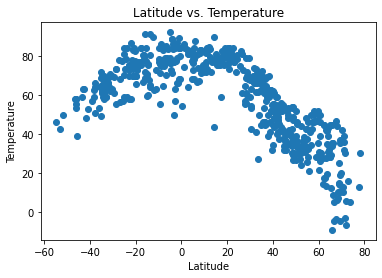

Analysis: Temperature gets warmer as Latitude nears 0 degrees.


In [13]:
plt.scatter(cities_df["lat"], cities_df["temp_max"], marker = "o")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig("Pics/Temperature.png")
plt.show()

print("Analysis: Temperature gets warmer as Latitude nears 0 degrees.")

## Latitude vs. Humidity Plot

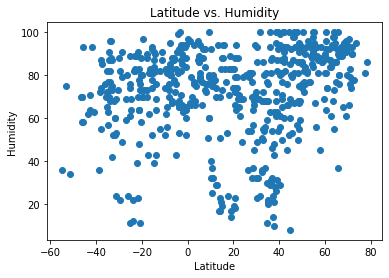

My Analysis


In [14]:
plt.scatter(cities_df["lat"], cities_df["humidity"], marker = "o")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Pics/Humidity.png")
plt.show()

print("My Analysis")

## Latitude vs. Cloudiness Plot

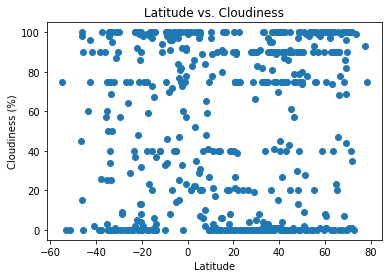

Analysis: Clouds are relatively dispersed regardless of Latitude


In [15]:
plt.scatter(cities_df["lat"], cities_df["clouds"], marker = "o")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Pics/Cloudiness.png")
plt.show()

print("Analysis: Clouds are relatively dispersed regardless of Latitude")

## Latitude vs. Wind Speed Plot

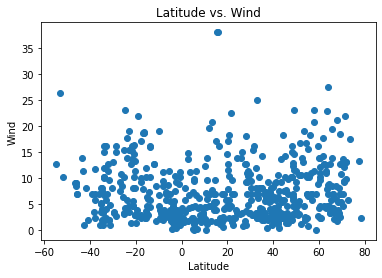

Analysis: Overall wind is fairly calm in cities studied and fairly consistent regardless of Latitude 


In [16]:
plt.scatter(cities_df["lat"], cities_df["wind"], marker = "o")
plt.title("Latitude vs. Wind")
plt.xlabel("Latitude")
plt.ylabel("Wind")

plt.savefig("Pics/Wind_Speed.png")
plt.show()

print("Analysis: Overall wind is fairly calm in cities studied and fairly consistent regardless of Latitude ")

## Linear Regression

In [17]:
#Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df["lat"].astype(float) > 0]
southern_df = cities_df.loc[cities_df["lat"].astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y= -0.97x+ 90.55
The r-squared is: 0.7659025256754315


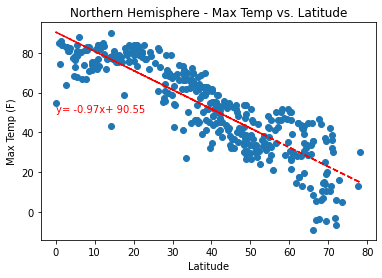

Analysis: There is a strng linear relationship between temperature and latitude.


In [18]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["temp_max"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/NorthernHem_MaxTempvs.Lat.png")
plt.show()

print("Analysis: There is a strng linear relationship between temperature and latitude.")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y= 0.53x+ 81.63
The r-squared is: 0.43480521402254857


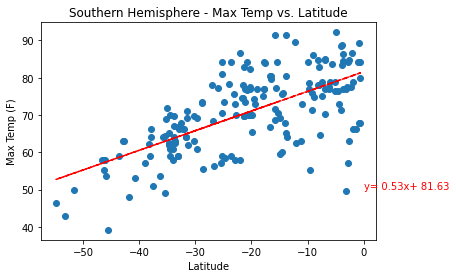

Analysis: there is less of a linear relationship in Southern vs. Northern Hemisphere regarding Max Temps and Latitude


In [19]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["temp_max"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/SouthernHem_MaxTempvs.Lat.png")
plt.show()

print("Analysis: there is less of a linear relationship in Southern vs. Northern Hemisphere regarding Max Temps and Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y= 0.33x+ 60.46
The r-squared is: 0.08564962916259891


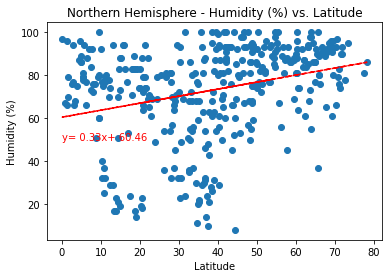

Analysis: There is almost no linear relationship drawn between humidity and latitude in Northern Hemisphere


In [20]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["humidity"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/NorthernHem_Humidityvs.Lat.png")
plt.show()

print("Analysis: There is almost no linear relationship drawn between humidity and latitude in Northern Hemisphere")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y= 0.29x+ 77.84
The r-squared is: 0.04618353069385126


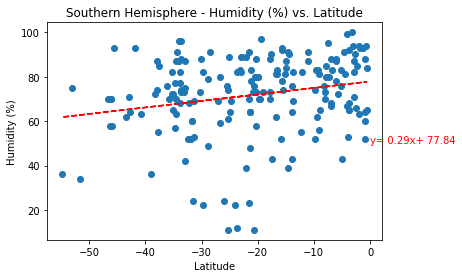

Analysis: There is even less linear relationship in Southern vs. Northern hemisphere when comparing humidty to latitude


In [21]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["humidity"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/SouthernHem_Humidityvs.Lat.png")
plt.show()

print("Analysis: There is even less linear relationship in Southern vs. Northern hemisphere when comparing humidty to latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y= 0.47x+ 34.9
The r-squared is: 0.05158926626635747


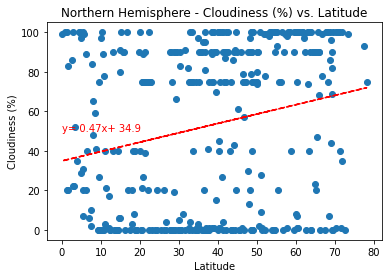

Analysis: Again, small correlation between cloudiness and latitude in Northern Hemisphere realized


In [22]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["clouds"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/NorthernHem_Cloudinessvs.Lat.png")
plt.show()

print("Analysis: Again, small correlation between cloudiness and latitude in Northern Hemisphere realized")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y= 0.59x+ 63.33
The r-squared is: 0.036916294373255665


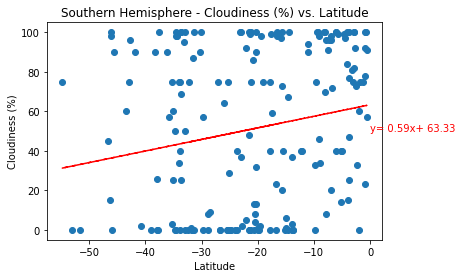

Analysis: Small relationship as well in Southern hemisphere between clouds present and latitude. Large dispersement.


In [23]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["clouds"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/SouthernHem_Cloudinessvs.Lat.png")
plt.show()

print("Analysis: Small relationship as well in Southern hemisphere between clouds present and latitude. Large dispersement.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [27]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["wind"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/NorthernHem_WindSpeedvs.Lat.png")
plt.show()

print("Analysis: There is a mild correlation between wind speed and latitude."

SyntaxError: unexpected EOF while parsing (<ipython-input-27-21c8a92c7ae6>, line 28)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y= -0.09x+ 5.61
The r-squared is: 0.04959404341105589


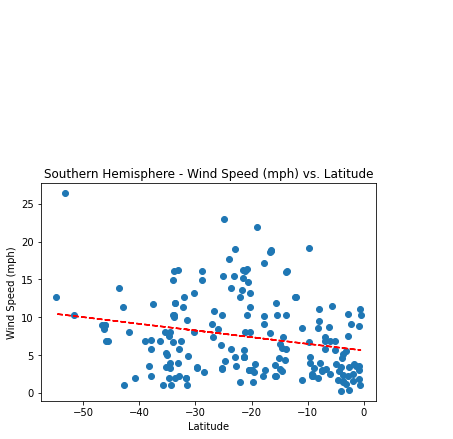

My Analysis


In [25]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["wind"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/SouthernHem_WindSpeedvs.Lat.png")
plt.show()

print("My Analysis")